In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [25]:
palette = ['#003f5c', '#7a5195', '#ef5675', '#ffa600'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Distance beetwen AP and STAs [m]"

In [26]:
data = pd.read_csv('distanceF.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,dataRate,scenario,switchAuxPhy
0,407459,1,1,1,1,1.82538,0.000015,0.067985,105.0510,1652238624,...,1101413,1.00482,1.00482,121.000,121.000,16.1618,73512.9,107,A,0
1,407459,1,1,1,2,2.75219,0.000017,0.084516,104.0630,1636640800,...,1101413,1.00891,1.00891,121.000,121.000,18.2574,90525.2,107,B,0
2,407459,1,1,1,2,2.79432,0.000017,0.085422,104.0170,1635931808,...,1101413,1.00827,1.00827,121.000,121.000,18.3414,91455.8,107,C,0
3,407459,1,1,1,3,2.63643,0.000017,0.082035,104.1840,1638589000,...,1101413,1.00598,1.00598,121.000,121.000,17.9895,87972.5,107,D,0
4,407459,1,1,3,1,1.82538,0.000015,0.067985,105.0510,1652238624,...,1101413,1.00482,1.00482,121.000,121.000,16.1618,73512.9,107,A,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,407461,1,1,31,2,47.19980,0.000263,1.441560,56.5038,888605344,...,1101413,1.01420,1.01420,120.998,120.998,152.8650,838339.0,107,B,0
174,407461,1,1,31,2,39.66360,0.000228,1.353230,64.5677,1015436984,...,1101413,1.01383,1.01383,120.999,120.999,151.6510,899290.0,107,C,0
175,407464,1,1,31,3,51.22450,0.000291,1.481870,52.1987,820872160,...,1101413,1.02087,1.02087,121.000,121.000,156.1870,796093.0,107,D,0
176,407466,1,1,31,3,51.14000,0.000290,1.482070,52.2903,822293200,...,1101413,1.02035,1.02035,120.997,120.997,155.8330,797575.0,107,D,0


C:\Users\Admin\AppData\Local\Temp\ipykernel_30196\2109054320.py:12: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  ax.legend(


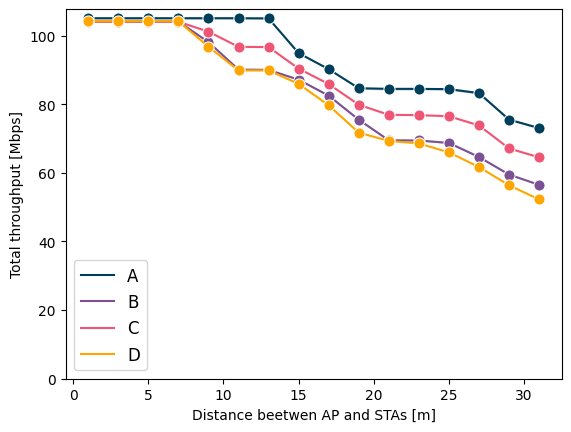

In [27]:
plot_sum = data.groupby(['scenario', 'linksNumber', 'rngRun', 'throughput', 'loss', 'jitter', 'latency', 'distance']).sum().reset_index()
plot_sum
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='throughput', hue='scenario', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:8],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
ax.set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
plt.savefig('dist_thr.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_30196\2574258729.py:10: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  ax.legend(


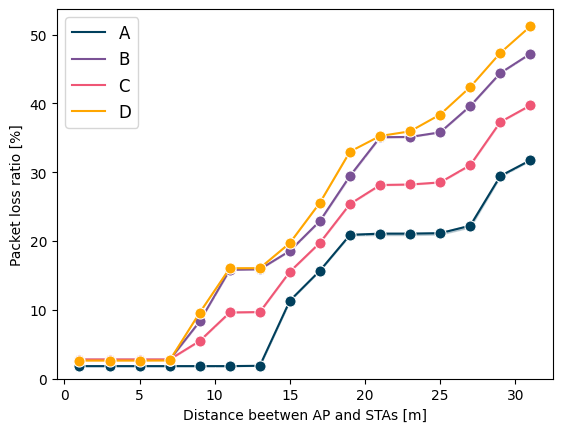

In [28]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='loss', hue='scenario', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:8],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0) 
ax.set(xlabel=xlabel, ylabel='Packet loss ratio [%]')
plt.savefig('dist_loss.svg', bbox_inches='tight')

In [29]:
plot_sum = plot_sum[plot_sum['latency'] != 0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_30196\4129210362.py:10: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  ax.legend(


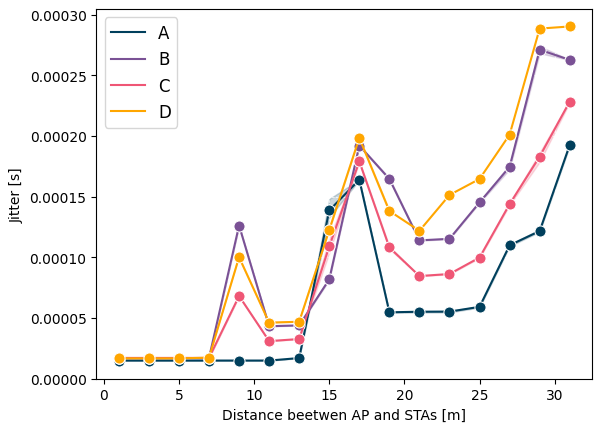

In [30]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='jitter', hue='scenario', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:8],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0) 
ax.set(xlabel=xlabel, ylabel='Jitter [s]')
plt.savefig('dist_jitt.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_30196\2316253848.py:10: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 4
  ax.legend(


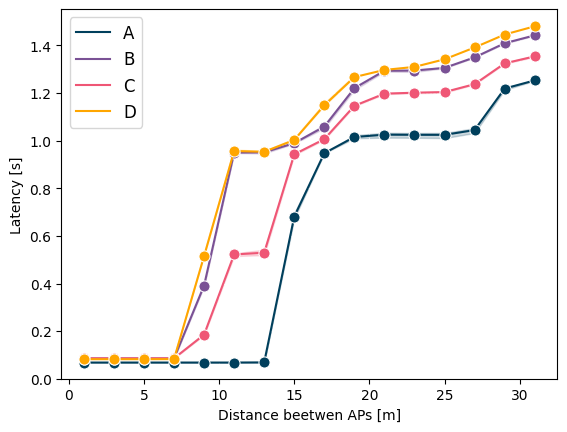

In [31]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='latency', hue='scenario', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='nStations')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:8],
      labels=['A', 'B', 'C', 'D'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel='Distance beetwen APs [m]', ylabel='Latency [s]')
ax.set_ylim(0)  
plt.savefig('dist_lat.svg', bbox_inches='tight')

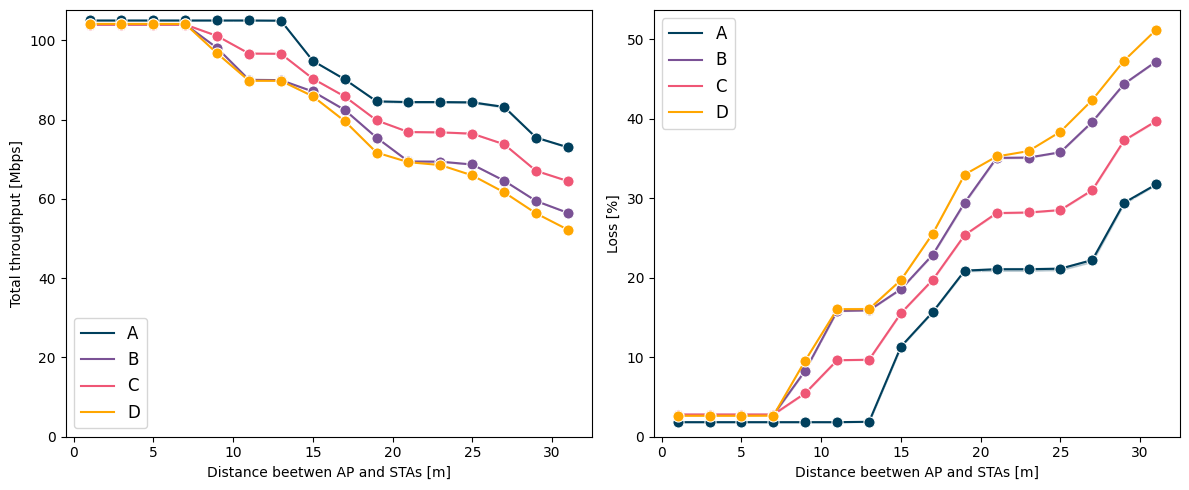

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Throughput
sns.lineplot(data=plot_sum, x='distance', y='throughput', hue='scenario', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='nStations')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:5], labels=['A', 'B', 'C', 'D'], 
               ncol=1, fontsize='large')

axes[0].set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Loss
sns.lineplot(data=plot_sum, x='distance', y='loss', hue='scenario', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='nStations')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:5], labels=['A', 'B', 'C', 'D'], 
               ncol=1, fontsize='large')

axes[1].set(xlabel=xlabel, ylabel='Loss [%]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('dist_thr_loss.svg', bbox_inches='tight')
plt.show()


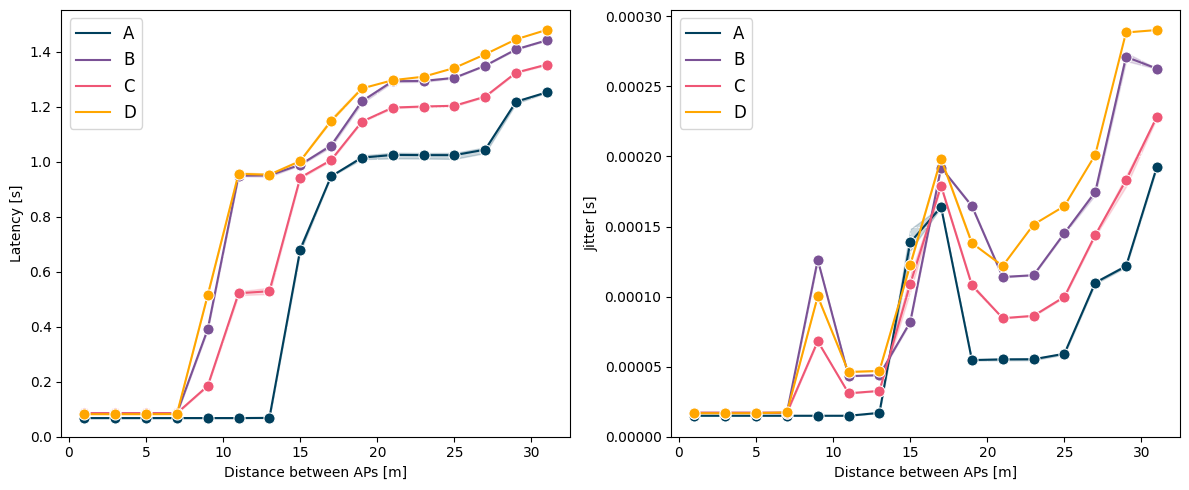

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Latency
sns.lineplot(data=plot_sum, x='distance', y='latency', hue='scenario', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='nStations')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:5], labels=['A', 'B', 'C', 'D'], 
               ncol=1, fontsize='large')

axes[0].set(xlabel='Distance between APs [m]', ylabel='Latency [s]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Jitter
sns.lineplot(data=plot_sum, x='distance', y='jitter', hue='scenario', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='nStations')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:5], labels=['A', 'B', 'C', 'D'], 
               ncol=1, fontsize='large')

axes[1].set(xlabel='Distance between APs [m]', ylabel='Jitter [s]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('dist_lat_jitter.svg', bbox_inches='tight')
plt.show()
